<a href="https://colab.research.google.com/github/Devansh1093/Devansh1093/blob/main/CNNLungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid # Corrected import
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from torchvision import models

In [4]:
 #Mount Google Drive to access dataset files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#Define path of training, validation and test datasets
import os
train_folder ='/content/drive/MyDrive/Colab/Dataset/archive/train'

test_folder = '/content/drive/MyDrive/Colab/Dataset/archive/Test'
#print(os.listdir(train_folder))
#print(os.listdir(test_folder))



In [30]:
# Apply Preprocessing (Transform)
transform = transforms.Compose([
    transforms.Grayscale(),        # convert to grayscale
    transforms.Resize((224,224)),  # resize images
    transforms.ToTensor(),         # convert to tensor
    transforms.Normalize(mean=[0.485], std=[0.229])  # normalize
])


In [31]:
#Load dataset
dataset = datasets.ImageFolder(train_folder, transform=transform)
#Split data into test and train
test_dataset = datasets.ImageFolder(test_folder, transform=transform)
#Create DataLoaders
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [32]:
#Define Model
model = models.resnet18(pretrained=True)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 3)
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [28]:
#Define Loss Function and Define Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)


In [38]:
#Training Loop
num_epochs = 10
losses =[]
for epoch in range(num_epochs):
    model.train()
    for batch, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
        if batch % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch+1}/{len(train_loader)}, Loss: {loss.item()}')



Epoch 1/10, Batch 1/35, Loss: 0.9847573637962341
Epoch 1/10, Batch 11/35, Loss: 0.9905068874359131
Epoch 1/10, Batch 21/35, Loss: 0.9838899374008179
Epoch 1/10, Batch 31/35, Loss: 1.0089175701141357
Epoch 2/10, Batch 1/35, Loss: 0.9844675064086914
Epoch 2/10, Batch 11/35, Loss: 0.9853895306587219
Epoch 2/10, Batch 21/35, Loss: 1.0026158094406128
Epoch 2/10, Batch 31/35, Loss: 0.9956743717193604
Epoch 3/10, Batch 1/35, Loss: 0.9844415187835693
Epoch 3/10, Batch 11/35, Loss: 0.9851279258728027
Epoch 3/10, Batch 21/35, Loss: 0.9847347140312195
Epoch 3/10, Batch 31/35, Loss: 0.9857213497161865
Epoch 4/10, Batch 1/35, Loss: 0.9851720333099365
Epoch 4/10, Batch 11/35, Loss: 0.9916417598724365
Epoch 4/10, Batch 21/35, Loss: 0.9764344692230225
Epoch 4/10, Batch 31/35, Loss: 0.9806790947914124
Epoch 5/10, Batch 1/35, Loss: 0.9891027212142944
Epoch 5/10, Batch 11/35, Loss: 0.9866017699241638
Epoch 5/10, Batch 21/35, Loss: 0.9768277406692505
Epoch 5/10, Batch 31/35, Loss: 0.9860567450523376
Epoch

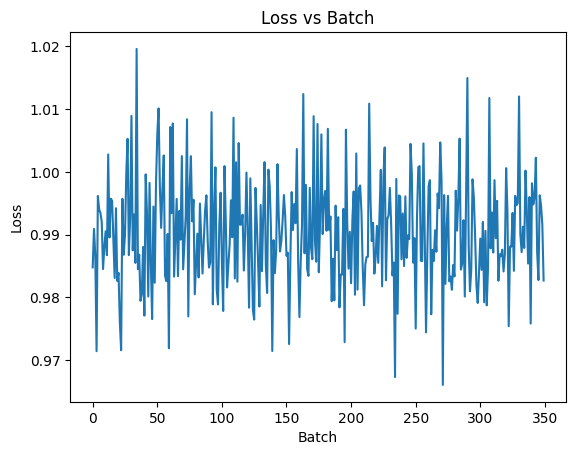

In [49]:
#Graph of loss and epooch
plt.plot(losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss vs Batch')
plt.show()


In [50]:
#Testing the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():

    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        output = model(data)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 68.02%
